In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np

In [182]:
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

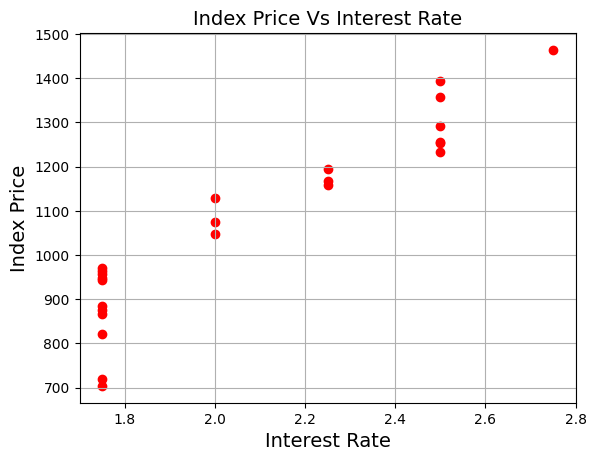

In [183]:
# checking interest_rate and index_price for linearity
plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

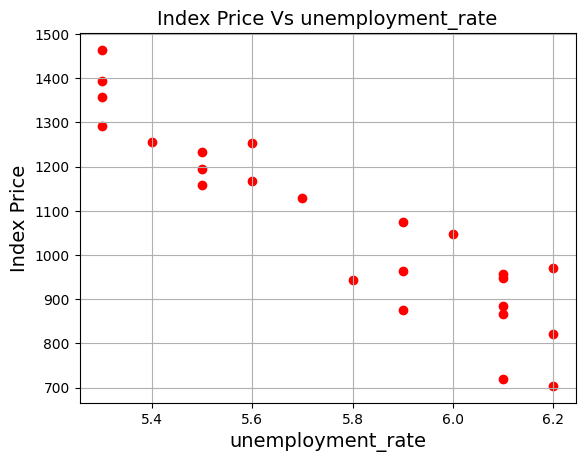

In [184]:
# checking unemployment_rate and index_price for linearity
plt.scatter(df['unemployment_rate'], df['index_price'], color='red')
plt.title('Index Price Vs unemployment_rate', fontsize=14)
plt.xlabel('unemployment_rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [185]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [186]:
# transforming pandas df to numpy arrays
X = x.to_numpy()
Y = y.to_numpy()
# adding 1 to X matrix (needed for finding intercept, because usually this column in ommited)
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
# calculating coeficents by using MSE matrix formula
coef = np.linalg.inv(X.T.dot(X))
coef = coef.dot(X.T.dot(Y))


In [187]:
print('SKLEARN Intercept: \n', regr.intercept_)
print('SKLEARN Coefficients: \n', regr.coef_)
print("="*20)
print('SKLEARN Intercept: \n', coef[0])
print('SKLEARN Coefficients: \n', [coef[1], coef[2]])

SKLEARN Intercept: 
 1798.403977625855
SKLEARN Coefficients: 
 [ 345.54008701 -250.14657137]
SKLEARN Intercept: 
 1798.4039776235336
SKLEARN Coefficients: 
 [345.54008701078925, -250.1465713692149]


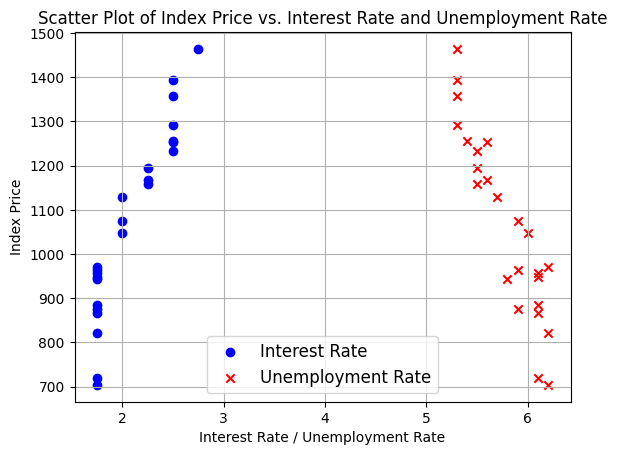

In [188]:
import matplotlib.pyplot as plt

data = {
    'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
}

# Create a scatter plot of interest_rate vs. index_price
plt.scatter(data['interest_rate'], data['index_price'], label='Interest Rate', color='blue', marker='o')

# Create a scatter plot of unemployment_rate vs. index_price
plt.scatter(data['unemployment_rate'], data['index_price'], label='Unemployment Rate', color='red', marker='x')

# Set plot labels and title
plt.xlabel('Interest Rate / Unemployment Rate')
plt.ylabel('Index Price')
plt.title('Scatter Plot of Index Price vs. Interest Rate and Unemployment Rate')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
